In [4]:
pip install beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [31]:
import requests

In [32]:
from bs4 import BeautifulSoup


In [33]:
import pandas as pd

In [34]:
base_url='https://www.airlinequality.com/airline-reviews/british-airways'

In [35]:
pages=10
page_size=100
reviews =[]
 #for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [38]:
df=pd.DataFrame()
df["reviews"]=reviews
df.head()

,reviews
0,✅ Trip Verified | Boarding was difficult caus...
1,✅ Trip Verified | Boarding started with a del...
2,✅ Trip Verified | Absolutely horrible custome...
3,Not Verified | BA is not what it used to be! ...
4,"✅ Trip Verified | BA First, it's not even the..."


In [82]:
df.to_csv("/Users/jaishreeram/Desktop/Data/BA_review.csv")

In [83]:
df=pd.read_csv('/Users/jaishreeram/Desktop/Data/BA_review.csv')

In [84]:
import re
import string


In [85]:
def clean_text(text):
    text=text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\d', '', text)
    text = re.sub('\s+', ' ', text)
    return text

In [86]:
df['Cleaned_review'] = df['reviews'].apply(clean_text)

In [87]:
print(df.head())


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                             reviews  \
0  ✅ Trip Verified |  Boarding was difficult caus...   
1  ✅ Trip Verified |  Boarding started with a del...   
2  ✅ Trip Verified |  Absolutely horrible custome...   
3  Not Verified |  BA is not what it used to be! ...   
4  ✅ Trip Verified |  BA First, it's not even the...   

                                      Cleaned_review sentiment  
0  ✅ trip verified boarding was difficult caused ...  negative  
1  ✅ trip verified boarding started with a delay ...  positive  
2  ✅ trip verified absolutely horrible customer s...  negative  
3  not verified ba is not what it used to be as m...  positive  
4  ✅ trip verified ba first its not even the best...  positive  


In [88]:
from textblob import TextBlob

In [89]:
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity==0:
        return 'neutral'
    else:
        return 'negative'


In [90]:
df['sentiment']=df['Cleaned_review'].apply(get_sentiment)

In [91]:
print(df[['Cleaned_review', 'sentiment']].head(10))

                                      Cleaned_review sentiment
0  ✅ trip verified boarding was difficult caused ...  negative
1  ✅ trip verified boarding started with a delay ...  positive
2  ✅ trip verified absolutely horrible customer s...  negative
3  not verified ba is not what it used to be as m...  positive
4  ✅ trip verified ba first its not even the best...  positive
5  ✅ trip verified the worst business class exper...  negative
6  not verified quite possibly the worst business...  negative
7  not verified i will never be flying with ba ag...  positive
8  ✅ trip verified on the my trip to mexico city ...  positive
9  ✅ trip verified i upgraded at check in to club...  positive


In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [93]:
text=''.join(df['Cleaned_review'])

In [94]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


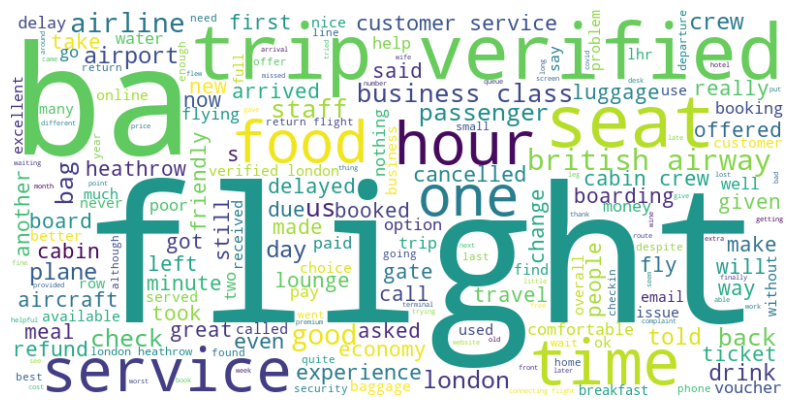

In [95]:
plt.figure(figsize=(10 ,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()